## Utkarsha Vidhale
# grad-admissions

 - [Data Scourse](https://www.kaggle.com/mohansacharya/graduate-admissions) 



This dataset is created for prediction of Graduate Admissions from an Indian perspective.


### Libraries used:

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
ap = pd.read_csv('ap.csv')
ap.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
ap1 = pd.read_csv('apv1.csv')
ap1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Droping column 'Serial No.'

In [5]:
ap=ap.drop(columns=['Serial No.'])
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


#### Converting 'Research' from int to bool

In [6]:
ap['Research bool'] = np.where(ap['Research']==0, 0, 1).astype(bool)
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
 8   Research bool      400 non-null    bool   
dtypes: bool(1), float64(4), int64(4)
memory usage: 25.5 KB


In [8]:
ap=ap.drop(columns=['Research'])
ap.describe(include="all")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research bool
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.724350,NaN
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.142609,NaN
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.340000,NaN
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.640000,NaN
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,0.730000,NaN
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,0.830000,NaN


In [19]:
ap.shape
ap.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance of Admit ', 'Research bool'],
      dtype='object')

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 ) 

TOEFL Scores ( out of 120 ) 

University Rating ( out of 5 ) 

Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 

Undergraduate GPA ( out of 10 ) 

Research Experience ( either 0 or 1 ) 

Chance of Admit ( ranging from 0.34 to 0.97 ) 

### Relating variables

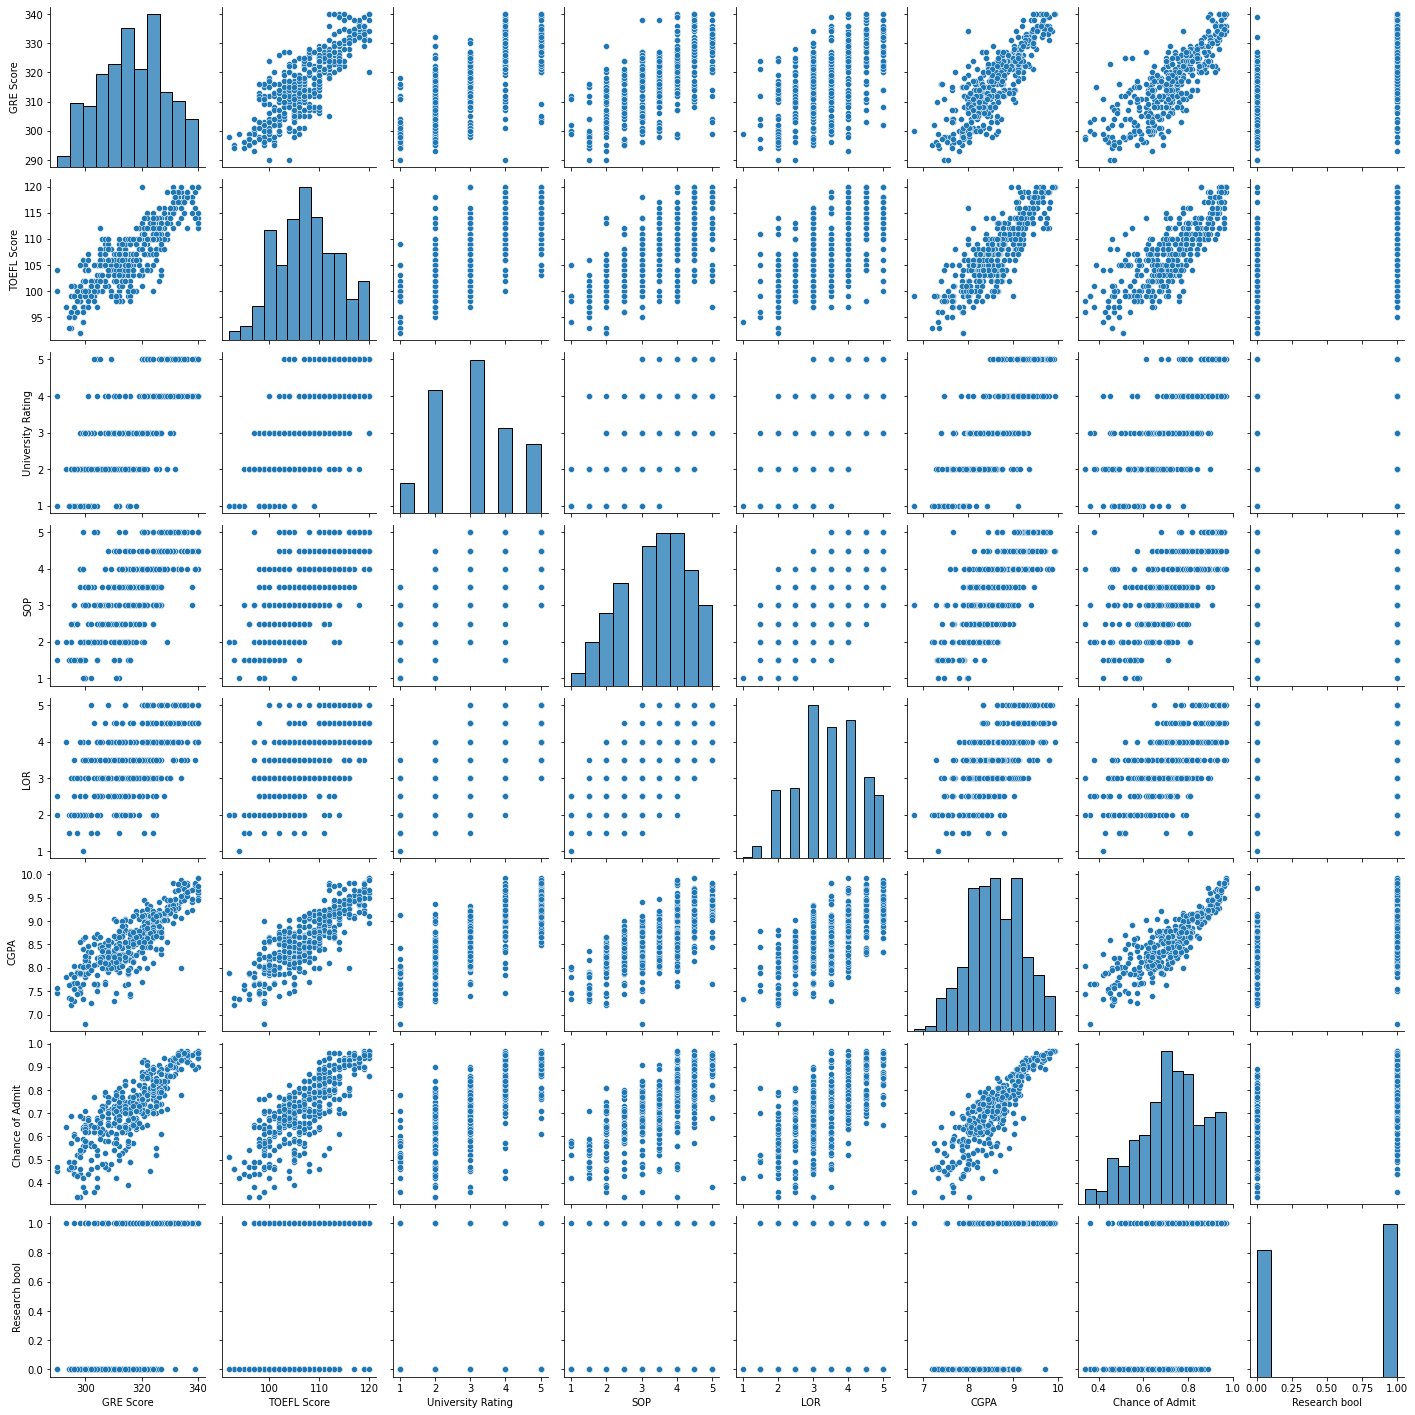

In [9]:
sns.pairplot(ap)

    From the above graph, it can be infered that `Chance of admit` is linearly related to most of the quantitative variables available. To get more detailed correlations, heatmat is plotted with respective co-efficients.

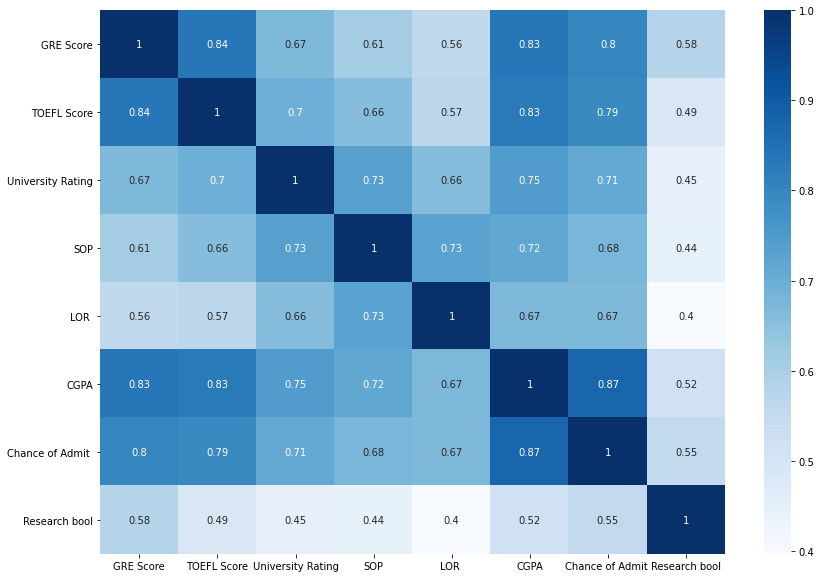

In [13]:
correlation_matrix = ap.corr()
figure = plt.figure(figsize = (14,10))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

The correlation coefficient measures the statistical stength of the reationshipt between two variables.  
Based on the above derieved coefficients, the `Chance of Admit`*Our variable of interest* is highly correlated 
 (Correlation measurement > +- 0.6 )  to following variables: 
 - `GRE Score` 
 
 - `Toefl Score` 
 
 - `University Ranking`
 
 - `SOP`
 
 - `LOR`
 
 - `CGPA`

##### Analyzing `Chance of Admit` and `Research bool`

<AxesSubplot:xlabel='Research bool', ylabel='Chance of Admit '>

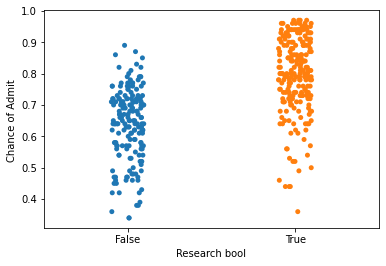

In [21]:
sns.stripplot(x=ap['Research bool'],y=ap['Chance of Admit '])

### Splittig the data

Size of dataset is relatively very less and hence, n cross-fold vaidation is used.

In [26]:
x = ap.drop('Chance of Admit ', 1)
y = ap['Chance of Admit ']
x.shape, y.shape
# N-fold cross validation
#acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()

((400, 7), (400,))

In [ ]:
#N-fold cross validation
clf = svm.SVC(kernel='linear', C=1, random_state=42)
acc=cross_val_score(clf, x, y, cv=4, scoring='accuracy')


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
X = ap.drop('Chance of Admit ', 1)
y = ap['Chance of Admit ']
kf = KFold(n_splits=2)
kf.get_n_splits(X)

In [26]:
list(ap.columns)

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Chance of Admit ',
 'Research bool']

In [27]:
from sklearn.model_selection import train_test_split
rs=42
predict="Chance of Admit"
X=np.array(ap.drop(['Chance of Admit '],1))
y=np.array(ap['Chance of Admit '])
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=rs)
#20% training and 80% testing

In [28]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions using the testing set
chance_y_pred = regr.predict(X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, chance_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, chance_y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, chance_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()